In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. Numeric data types & `summary` function!

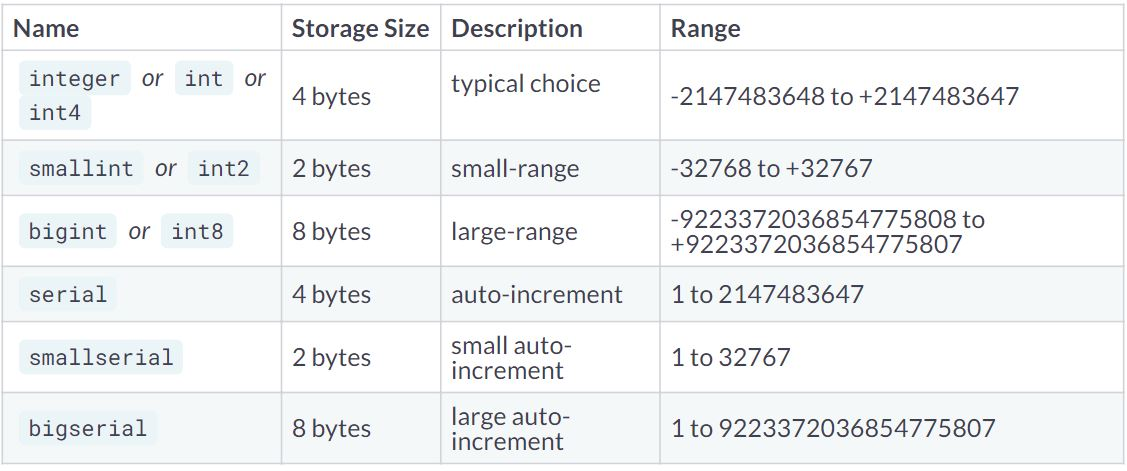

In [2]:
####

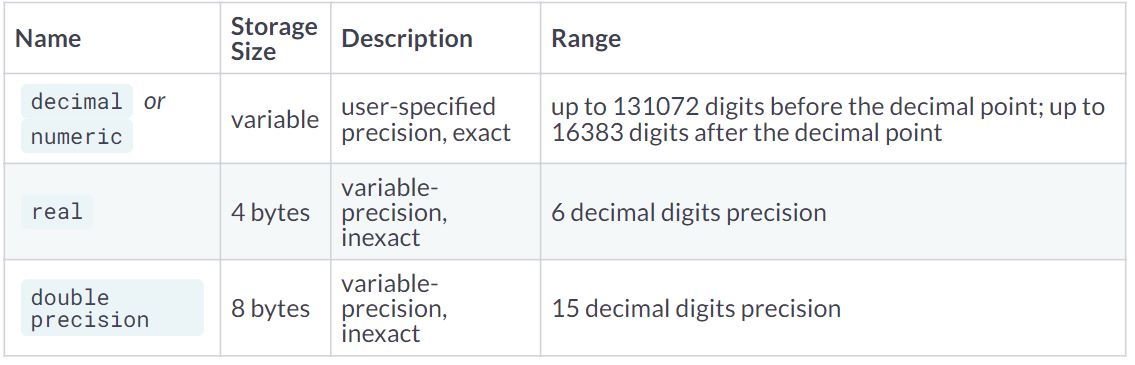

In [3]:
####

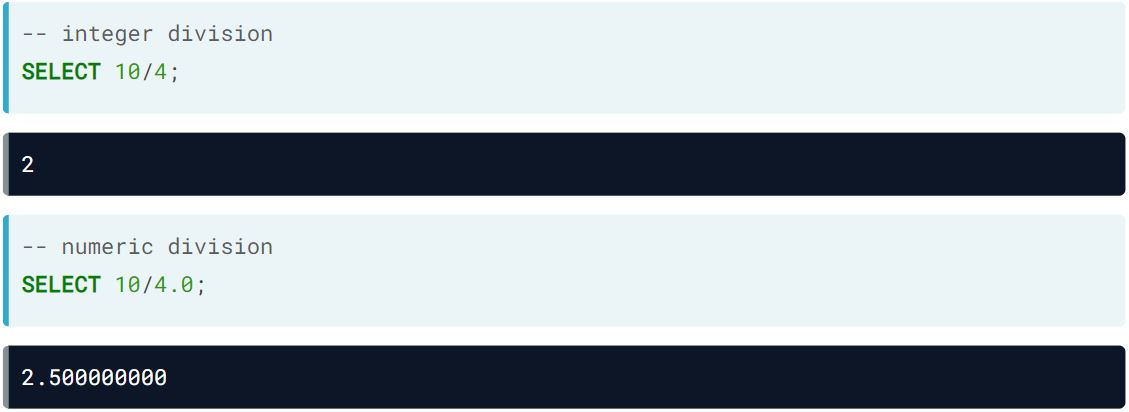

In [4]:
####

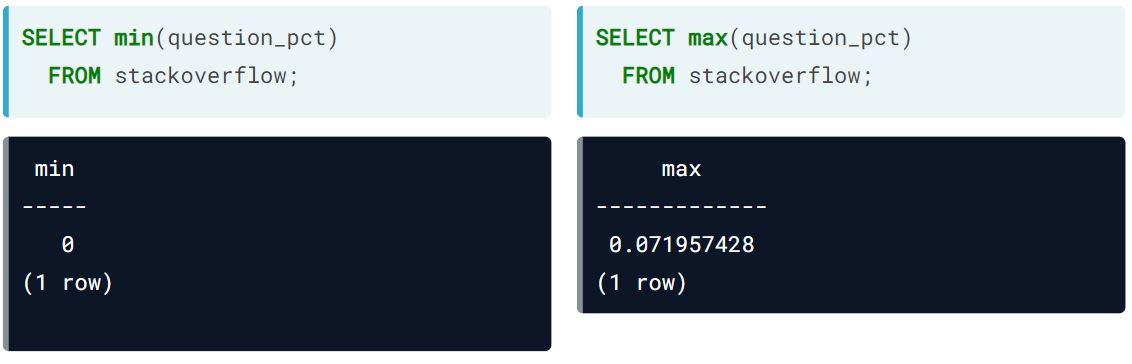

In [5]:
####

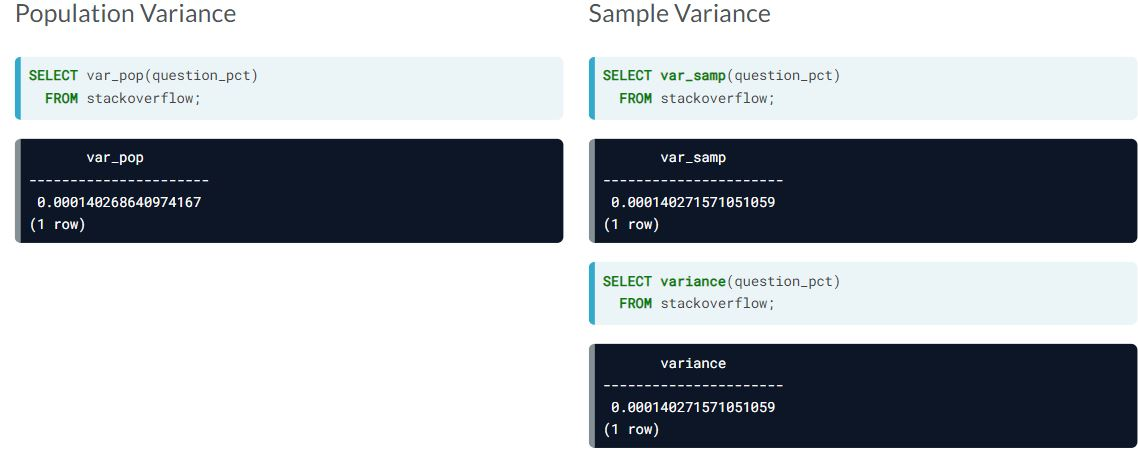

In [6]:
####

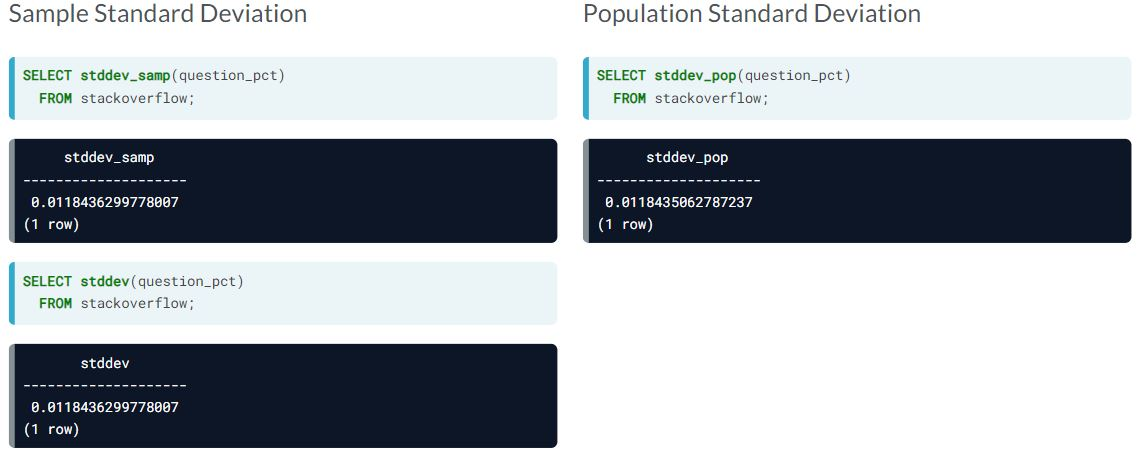

In [7]:
####

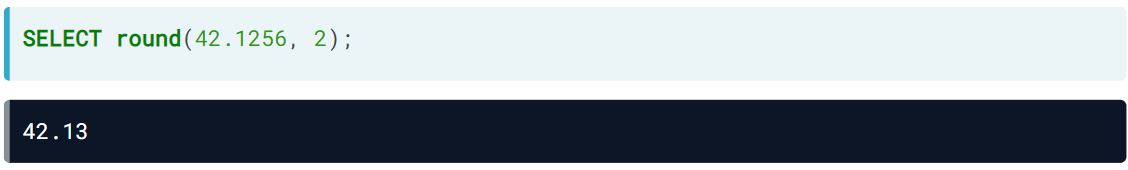

In [8]:
####

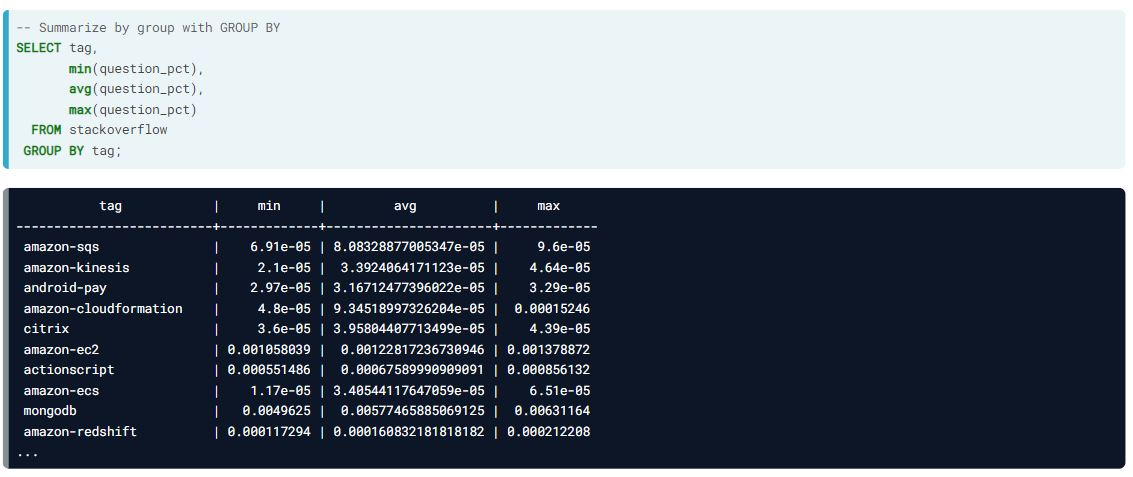

In [9]:
####

### EXERCISEs.
#### Exercise 1.1. Division
$\qquad$ Compute the `average revenue` per employee for `Fortune 500` companies by `sector`.

#### Instructions.
- Compute `revenue per employee` by dividing `revenues` by `employees`; use `casting` to produce a `numeric` result.
- Take the `average of revenue` per `employee` with `avg()`; alias this as `avg_rev_employee`.
- Group by `sector`.
- Order by the `average revenue` per `employee`.

**SOLUTION.**

                    -- Select average revenue per employee by sector
                    SELECT sector, 
                           AVG(revenues / employees::numeric) AS avg_rev_employee
                    FROM fortune500
                    GROUP BY sector
                    ORDER BY avg_rev_employee;
- **`query result`.**

sector|avg_rev_employee
:-|:-:
Hotels, Restaurants & Leisure|0.09498718151056814829
Apparel|0.27865942976680063809
Food & Drug Stores|0.30799950410060207070
Motor Vehicles & Parts|0.34252712424659522769
Household Products|0.35557338969595350494
Retailing|0.36019456092078082945
Industrials|0.36148543376146347043
Aerospace & Defense|0.36671499248628270960
Transportation|0.40365352477329589012
Business Services|0.42010994210166630178
Technology|0.57311847693359764307
Chemicals|0.59549976658074458280
Telecommunications|0.62958997279187493604
Health Care|0.79053286919681465178
Media|0.79561866565463184108
Food, Beverages & Tobacco|0.83088475939249850372
Engineering & Construction|0.86116376673874818555
Wholesalers|1.41324581189371202678
Financials|1.72638470140972568700
Energy|1.82601423325242362195
Materials|4.75758351554488369167   

- **Comments.** Now, we have known how to watch out for `integer division problems`, and that `ordering` your `query results` by the value of `interest` will help you make sense of the results.

#### Exercise 1.2. Explore with division
$\qquad$ In exploring a new database, it can be unclear what the data means and how columns are related to each other.

$\qquad$ What information does the `unanswered_pct` column in the `stackoverflow` table contain? Is it the percent of questions with the tag that are `unanswered` (`unanswered ?s` with `tag`/`all ?s` with `tag`)? Or is it something else, such as the percent of all unanswered questions on the site with the tag (`unanswered ?s` with `tag`/`all` `unanswered ?s`)?

Divide `unanswered_count` (`unanswered ?s` with `tag`) by `question_count` (`all ?s` with `tag`) to see if the value matches that of unanswered_pct to determine the answer.

#### Instructions
- Exclude rows where `question_count` is 0 to avoid a divide by zero error.
- Limit the result to 10 rows.

**SOLUTION.**

        SELECT unanswered_count/question_count::numeric AS computed_pct, -- Find the percentage again
               unanswered_pct    -- What are you comparing the above quantity to?
        FROM stackoverflow
        -- Select rows where question_count is not 0
        WHERE question_count != 0
        LIMIT 10;

- **`query result`.**

computed_pct|unanswered_pct
:-|:-
0.46548476454293628809|0.001751857
0.38636363636363636364|0.000116972
0.39376770538243626062|0.000058
0.33189655172413793103|0.0000161
0.42928571428571428571|0.000125312
0.34798961729250068974|0.012886449
0.35083862172255878033|0.007619406
0.30729166666666666667|0.0000123
0.35428051001821493625|0.0000811
0.38065776619993487463|0.000243743

- **Comments.** The values **don't match**, because `unanswered_pct` is the `percent of unanswered questions` on `Stack Overflow` with the `tag`, **not** the `percent of questions with the tag` that `are unanswered`.

#### Exercise 1.3. Summarize numeric columns
$\qquad$ Summarize the `profit` column in the `fortune500` table using the functions you've learned..

#### Instructions 
**Step 1.** Compute the `min()`, `avg()`, `max()`, and `stddev()` of `profits`.

**SOLUTION.**

                    SELECT MIN(profits), AVG(profits),
                           MAX(profits), STDDEV(profits)
                    FROM fortune500;
- **`query result`.**

min|avg|max|stddev
:-:|:-:|:-:|:-:
-6177|1783.4753507014028056|45687|3940.495363490788

**Step 2.**
- Now repeat step 1, but `summarize profits` by `sector`.
- `Order` the results by the `average profits` for each `sector`.

**SOLUTION.**

                -- Select sector and summary measures of fortune500 profits
                SELECT MIN(profits), AVG(profits),
                       MAX(profits), STDDEV(profits),
                       sector
                FROM fortune500
                GROUP BY sector
                ORDER BY avg;
- **`query result`.**

sector|min|avg|max|stddev
:-|-:|-:|-:|-:
Energy|-6177|10.4446428571428571|7840|2264.572142925951
Materials|-440|272.4684210526315789|1027|406.632781447055
Engineering & Construction|15|390.1692307692307692|911.8|277.665120197620
Wholesalers|-199.4|391.2793103448275862|2258|532.171183776766
Retailing|-2221|991.7851063829787234|13643|2348.342559077222
Chemicals|-3.9|1137.0214285714285714|4318|1129.752304492226
Business Services|57.2|1155.3550000000000000|5991|1454.360686992199
Food & Drug Stores|-502.2|1217.4285714285714286|4173|1613.041448851915
Apparel|396|1263.7000000000000000|3760|1419.134570786013
Hotels, Restaurants & Leisure|348|1451.0600000000000000|4686.5|1372.975732730432
Household Products|-198.8|1650.3083333333333333|10508|2900.116805001398
Transportation|69|1670.2941176470588235|4373|1373.013160657332
Industrials|-176.1|1727.6894736842105263|8831|2326.018251073599
Media|-495.9|1821.3363636363636364|9391|2839.299478136369
Motor Vehicles & Parts|-674.9|1919.5333333333333333|9427|3176.300731983670
Aerospace & Defense|-941|2093.3083333333333333|5302|2064.779951937795
Food, Beverages & Tobacco|-677|2346.1833333333333333|14239|3412.352156334481
Financials|-1128|2719.7761904761904762|24733|5064.764070852874
Health Care|-1721|2773.2605263157894737|16540|3751.818796086771
Telecommunications|-383.5|4127.2800000000000000|13127|5400.731732686270
Technology|-1672|4137.2418604651162791|45687|8042.983363606666

- **Comments.** Now, you have known how to get `basic summary measures` of `numeric variables`.

#### Exercise 1.4. Summarize group statistics
$\qquad$ Sometimes you want to understand how a value varies across groups. For example, how does the `maximum value` `per` `group` vary across groups?

$\qquad$ To find out, `first summarize` by `group`, and then compute `summary statistics` of the group results. One way to do this is to compute group values in a `subquery`, and then `summarize` the results of the `subquery`.

For this exercise, what is the `standard deviation` across tags in the `maximum number` of `Stack Overflow` questions per `day`? What about the `mean`, `min`, and `max` of the `maximums` as well?

#### Instructions
- Start by writing a `subquery` to compute the `max()` of `question_count` per `tag`; alias the `subquery` result as `maxval`.
- Then compute the standard deviation of maxval with `stddev()`.
- Compute the `min()`, `max()`, and `avg()` of `maxval` too.

**SOLUTION.**

                SELECT STDDEV(maxval), MIN(maxval),
                       MAX(maxval), AVG(maxval)
                  -- Subquery to compute max of question_count by tag
                  FROM( SELECT MAX(question_count) AS maxval
                        FROM stackoverflow
                        GROUP BY tag
                         ) AS max_results; -- alias for subquery
- **`query result`.**

stddev|min|max|avg
-:|-:|-:|:-
176458.37952720|30|1138658|52652.433962264151

- **Comments.**  A `subquery` was necessary here because the `tag maximums` must be `computed before` you can `summarize` them.

## 2. Exploring distributions
#### `COUNT` values

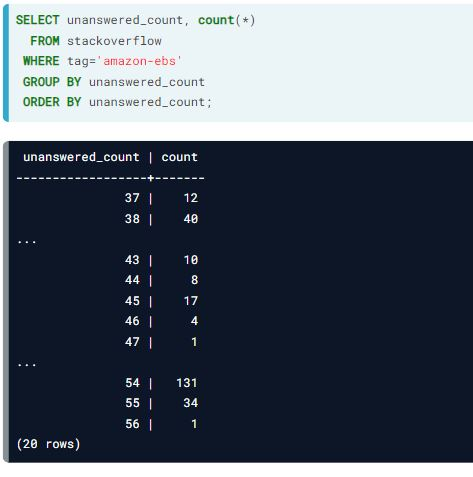

In [10]:
####

#### `TRUNCATE` function
$\qquad \diamond$ **`Syntax`**

                                    TRUNC(value, unit_index)
$\qquad \diamond$ **`Description.`**

$\qquad \qquad \bullet$ Returns a number truncated to a whole number or truncated to the specified decimal places. In the other words, it truncates numbers by replacing lower place value digits with zeros.

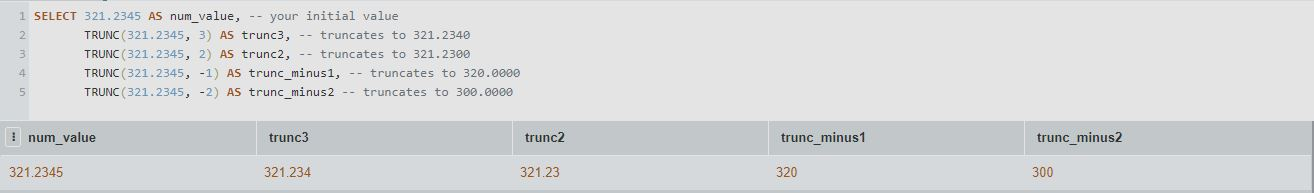

In [11]:
####

$\qquad \qquad \bullet$ If`value = datetime`, use can use the function [DATE_TRUNC](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Functions%20for%20Manipulating%20Data%20in%20PostgreSQL/working-with-date-time.ipynb) mentioned in [section2-Extracting & transforming/working-with-date-time](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Functions%20for%20Manipulating%20Data%20in%20PostgreSQL/working-with-date-time.ipynb) then it allows you to truncate a `datetime` value to the specified `unit`

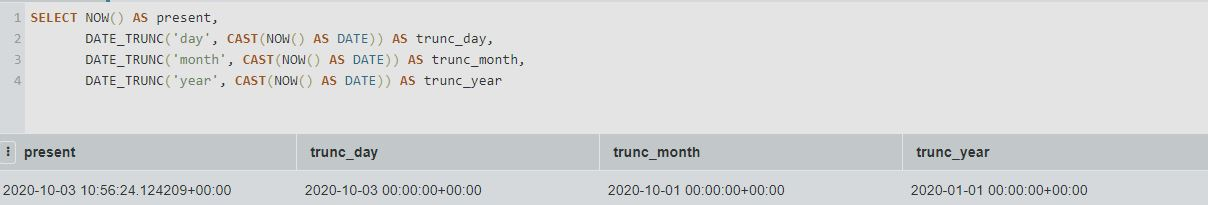

In [12]:
####

$\qquad \qquad \bullet$ In this [course](), we only focus on the `numeric type` when using `TRUNC`! And what happend if we used `TRUNC` and `GROUP` in many `aggregating function`?

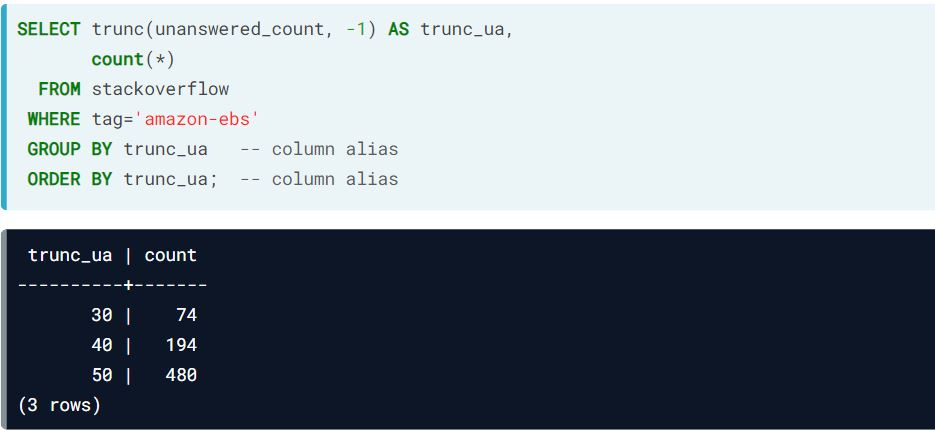

In [13]:
####

#### Generate a `series`.
$\qquad \diamond$ **`Syntax`**
        
                                generate_series(start, end, step)
$\qquad \diamond$ **`EXAMPLEs`.**

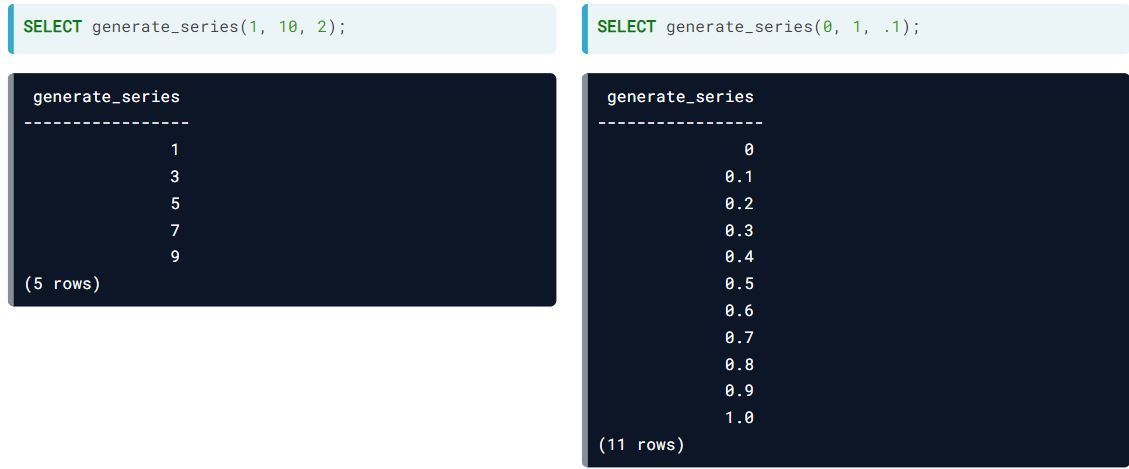

In [14]:
####

#### Create `bins`

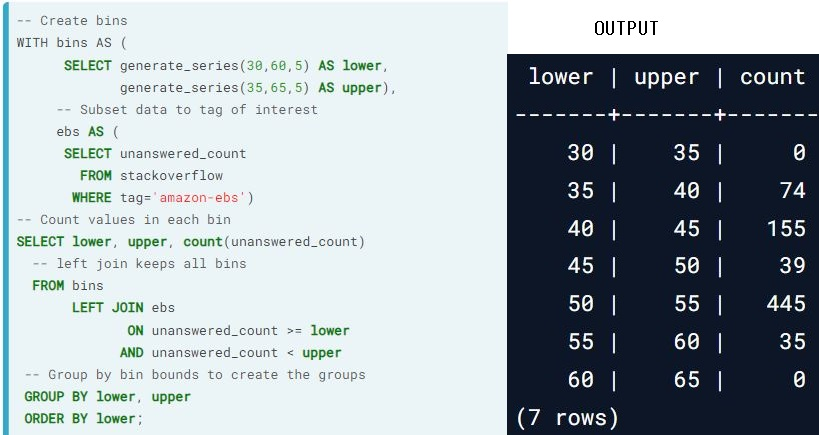

In [15]:
####

### EXERCISEs
#### Exercise 2.1. `Truncate`
$\qquad$ Use `trunc()` to examine the distributions of attributes of the `Fortune 500` companies.

$\qquad$ Remember that `trunc()` truncates numbers by replacing `lower place value digits` with `zeros`:

                    trunc(value_to_truncate, places_to_truncate)
$\qquad \quad \diamond$  `Negative values` for `places_to_truncate` indicate digits to the `left of the decimal to replace`, while 

$\qquad \quad \diamond$ `Positive values` indicate digits to the `right of the decimal` to keep.

#### Instructions.
**Step 1.** 
- Use `trunc()` to truncate employees to the 100,000s (5 zeros).
- Count the number of observations with each truncated value.

**SOLUTION.**

                SELECT TRUNC(employees, -5) AS employee_bin,
                       COUNT(*) -- Count number of companies with each truncated value
                FROM fortune500
                GROUP BY employee_bin
                ORDER BY count;
- **`query result`.**

employee_bin|count
-:|-:
2300000|1
400000|4
300000|7
200000|20
100000|35
0|433              

**Step 2.**
- Repeat step 1 for companies with < 100,000 employees (most common).
- This time, truncate employees to the 10,000s place.

**SOLUTION.**

                    SELECT TRUNC(employees, -4) AS employee_bin, -- Truncate employees to 10000 places
                           COUNT(*) -- Count number of companies with each truncated value
                      FROM fortune500
                    WHERE employees < 100000
                    GROUP BY employee_bin
                    ORDER BY employee_bin;
- **`query result`.**

employee_bin|count
-:|-:
0|102
10000|108
20000|63
30000|42
40000|35
50000|31
60000|18
70000|18
80000|6
90000|10

- **Comments.** Start **`exploring a distribution`** by `grouping values` into `large bins`, then `refine` as needed for ranges of values where there are a lot of observations.

#### Exercise 2.2. `Generate series`
$\qquad$ `Summarize the distribution` of the number of questions with the `tag` `"dropbox"` on `Stack Overflow` per day by `binning the data`.

**`Syntax`**:

                    generate_series(from, to, step)
#### Instructions.
**Step 1.** Start by selecting the minimum and maximum of the question_count column for the tag 'dropbox' so you know the range of values to cover with the bins.

**SOLUTION.**

- **`query result`.**

                    SELECT MIN(question_count), MAX(question_count)
                    FROM stackoverflow
                    WHERE tag = 'dropbox';
- **Comments**

| `min` | `max` |
|:-:|:-:|
|2315|3072|

**Step 2.** Next, `use generate_series()` to `create bins` of `size 50` from `2200` to `3100`.
- To do this, you need an `upper` and `lower bound` to define a `bin`.
- This will require you to `modify the stopping value` of the lower bound and the starting value of the upper bound by the `bin width`.

**SOLUTION.** We have `51` points between `2200` and `3100` if the `step_size = 50`; so the `lower` is in `[2200, 3050]` and the `upper` is in `[2250, 3100]`, hence.

                -- Create lower and upper bounds of bins
                SELECT generate_series(2200, 3050, 50) AS lower,
                       generate_series(2250, 3100, 50) AS upper;

- **`query result`.**

lower|upper
:-:|:-:
2200|2250
2250|2300
2300|2350
2350|2400
2400|2450
2450|2500
2500|2550
2550|2600
2600|2650
2650|2700
2700|2750
2750|2800
2800|2850
2850|2900
2900|2950
2950|3000
3000|3050
3050|3100


**Step 3.** Select `lower` and `upper` from `bins`, along with the `count of values` within each `bin bounds`.
- To do this, you'll need to `join 'dropbox'`, which contains the `question_count` for `tag` `"dropbox"`, to the `bins` created by `generate_series()`.
- The `join` should occur where the `count` is **`greater than or equal to the lower bound`**, and **`strictly less than the upper bound`**.

**SOLUTION.**

                    WITH bins AS (                                                 -- Bins created in Step 2
                          SELECT generate_series(2200, 3050, 50) AS lower,  
                                 generate_series(2250, 3100, 50) AS upper),
                         dropbox AS (                     -- Subset stackoverflow to just tag dropbox (Step 1)
                          SELECT question_count 
                          FROM stackoverflow
                          WHERE tag='dropbox') 
                    SELECT lower, upper, count(question_count)   -- What column are you counting to summarize?
                    FROM bins                                    -- Created above
                         -- keeping all rows from the bins table in the join to dropbox (created above)
                         LEFT JOIN dropbox
                             ON question_count >= lower          -- Compare question_count to lower and upper 
                                AND question_count < upper
                    GROUP BY lower, upper            -- Group by lower and upper to count values in each bin
                    ORDER BY lower;                         -- Order by lower to put bins in order
- **`query result`.**

lower|upper|count
:-:|:-:|-:
2200|2250|0
2250|2300|0
2300|2350|22
2350|2400|39
2400|2450|54
2450|2500|53
2500|2550|45
2550|2600|41
2600|2650|46
2650|2700|57
2700|2750|44
2750|2800|50
2800|2850|62
2850|2900|61
2900|2950|108
2950|3000|159
3000|3050|98
3050|3100|44

- **Comments** The `generate_series` allows you to `group values` into any `size interval` and also include `ranges` with `zero values`.

## 3. Some another `summary functions`.
#### `CORRELATION`
This is a basic concept in `Statistics`, the values of `correlation` must be in `[-1, 1]`

$\qquad \diamond$ if `correlation = 0` then both variables are **not correlated**!

$\qquad \diamond$ if `correlation = -1` then, **perfect `inverse` (decreasing) `linear` relationship** while

$\qquad \diamond$ if `correlation = 1` then, **perfect `direct` or `increasing` `linear` relationship**

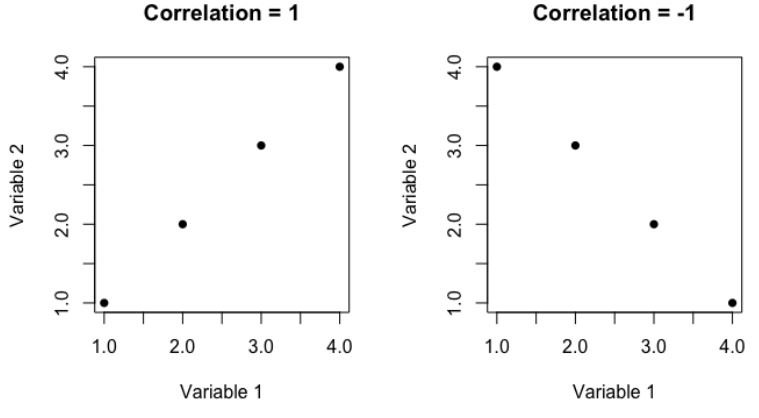

In [16]:
#### 

#### `corr` function in `SQL`

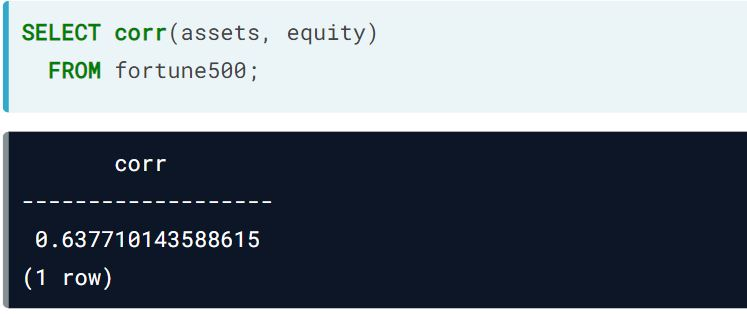

In [17]:
#### 

#### `Percentile` function,

$\qquad$ **`Definition.`** is a measure $X_{\alpha}$ used in `Statistics` indicating the value below which a `given percentage` $\alpha$ of observations in a group of observations falls; that meant

$$\text{Prob} \left( X \leq X_{\alpha} \right) = \alpha, \qquad \text{for } \alpha \in [0, 1]. $$

$\qquad$ **`Example`**, 

$\qquad \quad \diamond$ The `20th` `percentile` is the value (or score) `below` which `20%` of the `observations may be found`. Equivalently, `80%` of the observations are found `above the 20th percentile`.

$\qquad \quad \diamond$ The `50th percentile` is called `median` or `Q2`

$\qquad \quad \diamond$ The `25th percentile` is called `Q1`

$\qquad \quad \diamond$ The `75th percentile` is called `Q3`

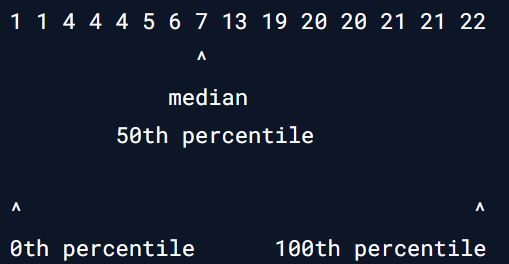

In [18]:
#### 

#### `Syntax`.

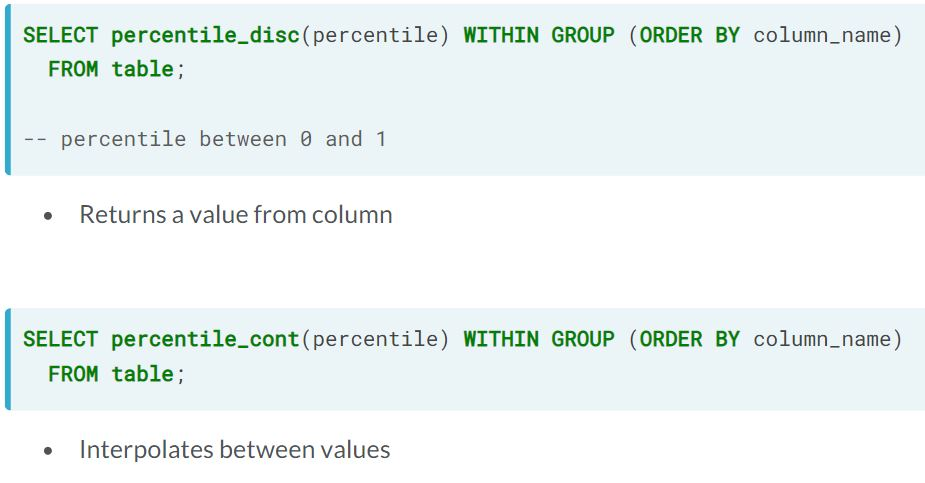

In [19]:
#### 

$\quad$ **Percentile examples**

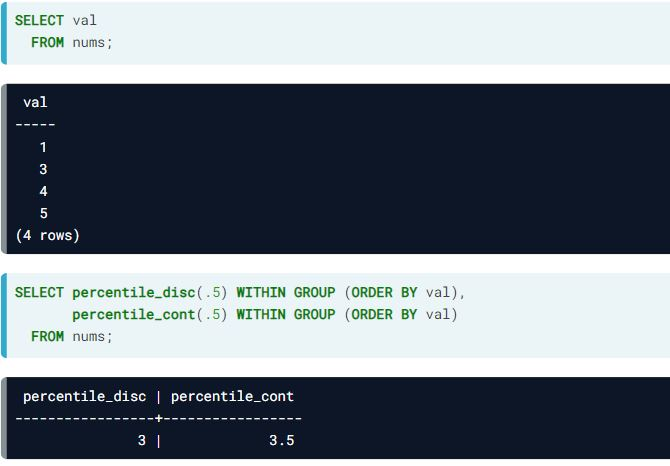

In [20]:
#### 

#### Common issues in `SQL summary`

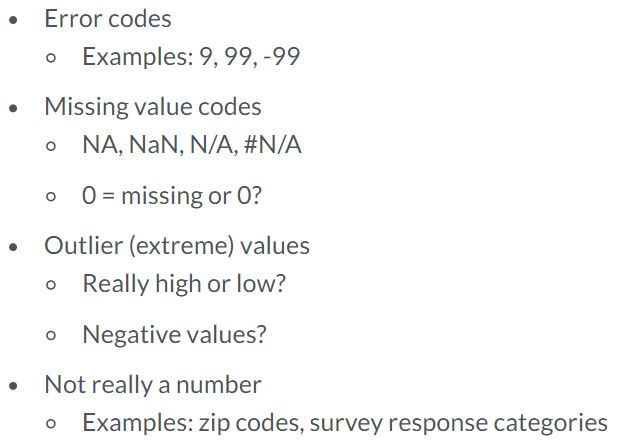

In [21]:
#### 

### EXERCISE
#### Exercise 3.1. `Correlation`.
$\qquad$ What's the `relationship` between a `company's revenue` and its other `financial attributes`? 

$\qquad$ Compute the `correlation` between `revenues` and other `financial variables` with the `corr()` function.

#### Instructions
- Compute the `correlation` between `revenues` and `profits`.
- Compute the `correlation` between `revenues` and `assets`.
- Compute the `correlation` between `revenues` and `equity`.

**SOLUTION.**

                SELECT corr(revenues, profits) AS rev_profits, -- Correlation between revenues and profit
                       corr(revenues, assets) AS rev_assets,   -- Correlation between revenues and assets
                       corr(revenues, equity) AS rev_equity    -- Correlation between revenues and equity
                FROM fortune500;
- **`query result`.**

rev_profits|rev_assets|rev_equity
:-:|:-:|:-:
0.599993581572479|0.329499521318506|0.546570999718431

- **Comments.** `Profits`, `assets`, and `equity` are all **`positvely correlated`** with `revenue` for Fortune 500 companies.

#### Exerices 3.2 Mean and Median
$\qquad$ Compute the `mean` (`avg()`) and `median` `assets` of `Fortune 500` companies by sector.

$\qquad$ Use the `percentile_disc()` function to compute the median:

                        percentile_disc(0.5) 
                        WITHIN GROUP (ORDER BY column_name)
#### Instructions
- Select the `mean and `median` of assets.
- Group by `sector`.
- Order the results by the `mean`.

**SOLUTION.**

                    SELECT sector, -- What groups are you computing statistics by?
                           AVG(assets) AS mean, -- Select the mean of assets with the avg function
                           percentile_disc(0.5) WITHIN GROUP (ORDER BY assets) AS median -- median
                    FROM fortune500
                    GROUP BY sector
                    ORDER BY mean;
- **`query result`.**

sector|mean|median
:-|-:|-:
Engineering & Construction|8199.2307692307692308|8709
Wholesalers|9362.5862068965517241|5390
Materials|10833.263157894737|7741
Apparel|11064.8000000000000000|9739
Retailing|14473.148936170213|7858
Hotels, Restaurants & Leisure|16795.400000000000|14330
Business Services|19626.100000000000|12485
Chemicals|20151.214285714286|15769
Household Products|23179.083333333333|10231
Food & Drug Stores|24630.714285714286|17464
Transportation|25922.000000000000|23286
Food, Beverages & Tobacco|29059.750000000000|15984
Media|30876.272727272727|22508
Aerospace & Defense|31897.666666666667|20038
Industrials|40117.684210526316|15201
Health Care|42078.894736842105|25396
Technology|48380.325581395349|17585
Energy|48756.210526315789|36119
Motor Vehicles & Parts|59443.111111111111|9901
Telecommunications|114922.700000000000|30879
Financials|319245.095238095238|123449

- **Comments** The `mean` and `median` can differ significantly for `skewed distributions` that have a few `extreme values`.

## 4. Creating temporary tables
#### `Syntax`

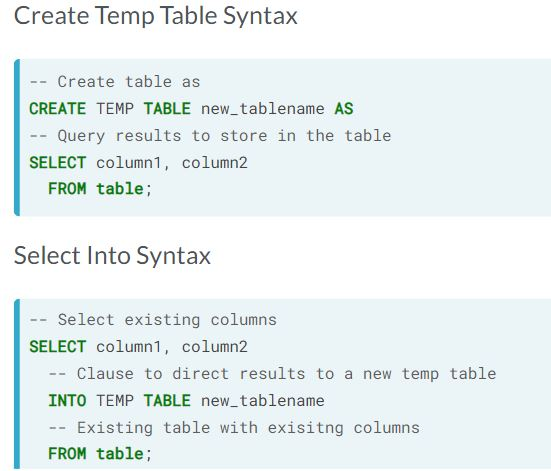

In [22]:
#### 

#### Create table.

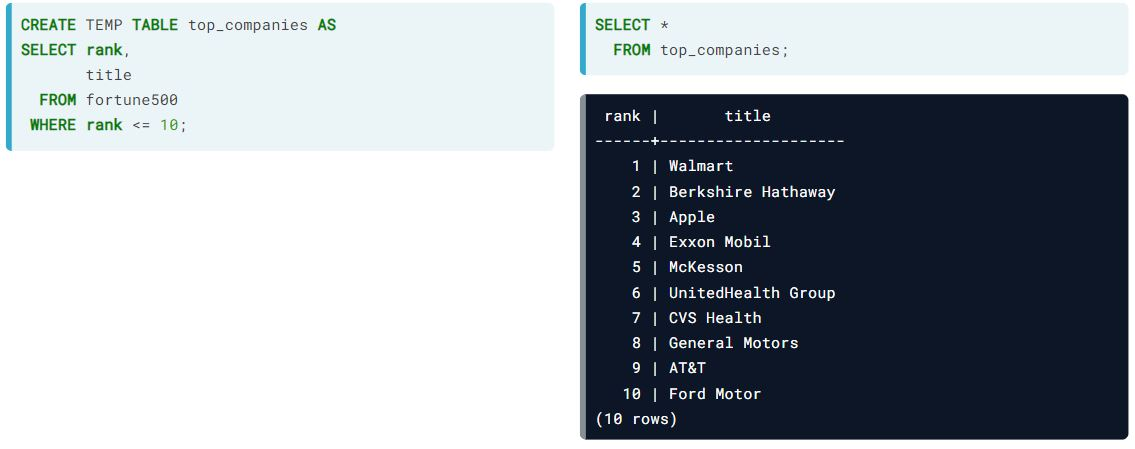

In [23]:
#### 

#### Insert to `TABLE`

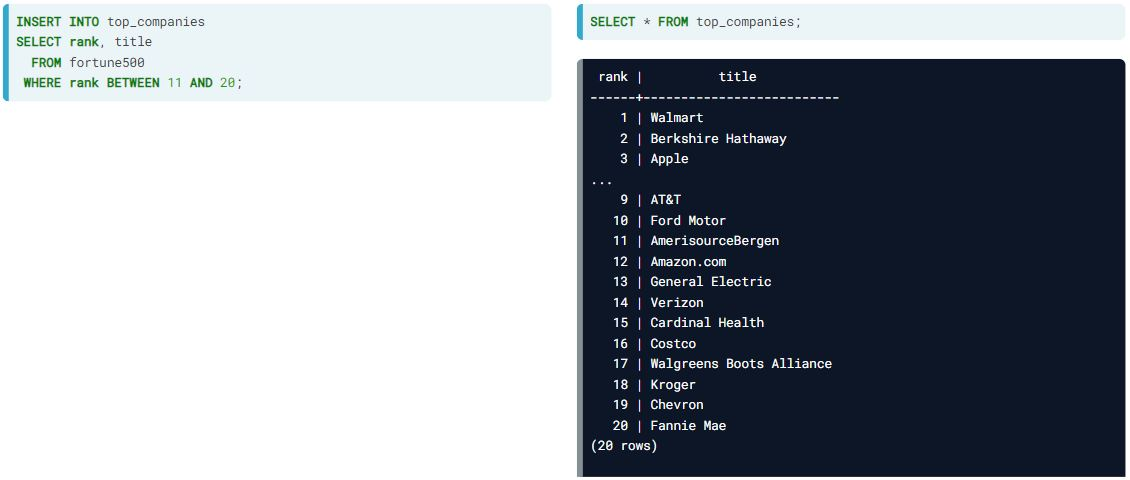

In [24]:
#### 

#### `Delete` or `drop` `table`

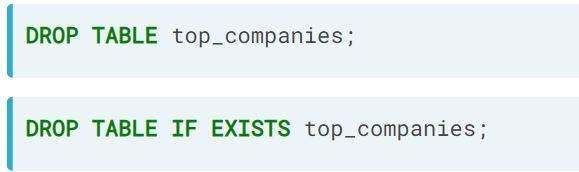

In [25]:
#### 

### EXERCISEs.
#### Exercise 4.1. Create a `temp table`
Find the `Fortune 500` companies that have `profits` in the `top 20%` for their `sector` (compared to other `Fortune 500` companies).

To do this, first, find the `80th percentile` of `profit` for each `sector` with

                    percentile_disc(fraction) 
                    WITHIN GROUP (ORDER BY sort_expression)
and save the results in a `temporary table`.

Then join `fortune500` to the `temporary table` to select `companies` with `profits` greater than the `80th percentile` cut-off.

#### Instructions.
**Step 1.**
- Create a `temporary` table called `profit80` containing the `sector` and `80th percentile` of `profits` for each `sector`.
- Alias the percentile column as `pct80`.

**SOLUTION.**

                    DROP TABLE IF EXISTS profit80;

                    CREATE TEMP TABLE profit80 AS -- Create the temporary table
                        SELECT sector, -- Select the two columns you need; alias as needed
                               percentile_disc(0.8) WITHIN GROUP (ORDER BY profits) AS pct80
                        FROM fortune500
                        GROUP BY sector;

                    -- See what you created: select all columns and rows 
                    SELECT * FROM profit80;
- **`query result`.**

sector|pct80
:-|-:
Aerospace & Defense|4895
Apparel|1074.1
Business Services|1401
Chemicals|1500
Energy|1311
Engineering & Construction|602.7
Financials|3014
Food & Drug Stores|2025.7
Food, Beverages & Tobacco|6073
Health Care|4965
Hotels, Restaurants & Leisure|1670
Household Products|2166
Industrials|3695
Materials|496
Media|2755
Motor Vehicles & Parts|4596
Retailing|1228
Technology|7266
Telecommunications|8695
Transportation|2676
Wholesalers|605.9

**Step 2.** 
- Using the `profit80` table you created in step 1, select `companies` that have `profits` greater than `pct80`.
- Select the `title`, `sector`, `profits` from `fortune500`, as well as the ratio of the company's profits to the 80th `percentile profit`.

**SOLUTION.**

                DROP TABLE IF EXISTS profit80;

                CREATE TEMP TABLE profit80 AS
                    SELECT sector, 
                           percentile_disc(0.8) WITHIN GROUP (ORDER BY profits) AS pct80
                    FROM fortune500 
                    GROUP BY sector;

                -- Select columns, aliasing as needed
                SELECT title, fortune500.sector, 
                       profits, profits/profit80.pct80 AS ratio
                FROM fortune500 
                    LEFT JOIN profit80
                       ON fortune500.sector = profit80.sector
                    WHERE fortune500.profits > profit80.pct80;

- **`query result`.**

title|sector|profits|ratio
:-|:-|-:|-:
Walmart|Retailing|13643|11.1099348534201954
Berkshire Hathaway|Financials|24074|7.9873921698739217
Apple|Technology|45687|6.2877786952931462
Exxon Mobil|Energy|7840|5.9801678108314264
McKesson|Wholesalers|2258|3.7266875722066348
UnitedHealth Group|Health Care|7017|1.4132930513595166
CVS Health|Health Care|5317|1.0708962739174220
General Motors|Motor Vehicles & Parts|9427|2.0511314186248912
AT&T|Telecommunications|12976|1.4923519263944796
AmerisourceBergen|Wholesalers|1427.9|2.3566595147714144
General Electric|Industrials|8831|2.3899864682002706
Verizon|Telecommunications|13127|1.5097182288671650
Cardinal Health|Wholesalers|1427|2.3551741211421027
Costco|Retailing|2350|1.9136807817589577
Walgreens Boots Alliance|Food & Drug Stores|4173|2.0600286320778003
Fannie Mae|Financials|12313|4.0852687458526875
J.P. Morgan Chase|Financials|24733|8.2060384870603849
Home Depot|Retailing|7957|6.4796416938110749
Wells Fargo|Financials|21938|7.2786994027869940
Bank of America Corp.|Financials|17906|5.9409422694094227
Alphabet|Technology|19478|2.6807046518029177
Microsoft|Technology|16798|2.3118634737131847
Citigroup|Financials|14912|4.9475779694757797
IBM|Technology|11872|1.6339113680154143
Phillips 66|Energy|1555|1.1861174675819985
Johnson & Johnson|Health Care|16540|3.3313192346424975
Procter & Gamble|Household Products|10508|4.8513388734995383
Valero Energy|Energy|2289|1.7459954233409611
Target|Retailing|2737|2.2288273615635179
Freddie Mac|Financials|7815|2.5928998009289980
Lowe’s|Retailing|3093|2.5187296416938111
PepsiCo|Food, Beverages & Tobacco|6329|1.0421537954882266
UPS|Transportation|3431|1.2821375186846039
Intel|Technology|10316|1.4197632810349573
Prudential Financial|Financials|4368|1.4492368944923689
United Technologies|Aerospace & Defense|5055|1.0326864147088866
Disney|Media|9391|3.4087114337568058
Pfizer|Health Care|7215|1.4531722054380665
Lockheed Martin|Aerospace & Defense|5302|1.0831460674157303
Sysco|Wholesalers|949.6|1.5672553226605050
Cisco Systems|Technology|10739|1.4779796311588219
Dow Chemical|Chemicals|4318|2.8786666666666667
Coca-Cola|Food, Beverages & Tobacco|6527|1.0747571216861518
Delta Air Lines|Transportation|4373|1.6341554559043348
Honeywell International|Industrials|4809|1.3014884979702300
Morgan Stanley|Financials|5979|1.9837425348374253
Goldman Sachs Group|Financials|7398|2.4545454545454545
Oracle|Technology|8901|1.2250206440957886
American Express|Financials|5408|1.7942932979429330
TJX|Retailing|2298.2|1.8714983713355049
Nike|Apparel|3760|3.5006051578065357
Gilead Sciences|Health Care|13501|2.7192346424974824
3M|Industrials|5050|1.3667117726657645
Time Warner|Media|3926|1.4250453720508167
Facebook|Technology|10217|1.4061381778144784
Capital One Financial|Financials|3751|1.2445255474452555
Philip Morris International|Food, Beverages & Tobacco|6967|1.1472089576815412
AbbVie|Health Care|5953|1.1989929506545821
McDonald’s|Hotels, Restaurants & Leisure|4686.5|2.8062874251497006
DuPont|Chemicals|2513|1.6753333333333333
Duke Energy|Energy|2152|1.6414950419527079
Enterprise Products Partners|Energy|2513.1|1.9169336384439359
Amgen|Health Care|7722|1.5552870090634441
U.S. Bancorp|Financials|5888|1.9535500995355010
Dollar General|Retailing|1251.1|1.0188110749185668
Starbucks|Hotels, Restaurants & Leisure|2817.7|1.6872455089820359
International Paper|Materials|904|1.8225806451612903
Union Pacific|Transportation|4233|1.5818385650224215
Southern|Energy|2448|1.8672768878718535
Altria Group|Food, Beverages & Tobacco|14239|2.3446402107689774
PG&E Corp.|Energy|1393|1.0625476735316552
PNC Financial Services Group|Financials|3903|1.2949568679495687
Nucor|Materials|796.3|1.6054435483870968
NextEra Energy|Energy|2912|2.2212051868802441
Bank of New York Mellon|Financials|3547|1.1768414067684141
Genuine Parts|Wholesalers|687.2|1.1341805578478297
Colgate-Palmolive|Household Products|2441|1.1269621421975993
Visa|Business Services|5991|4.2762312633832976
D.R. Horton|Engineering & Construction|886.3|1.4705491952878712
Dominion Energy|Energy|2123|1.6193745232646834
ADP|Business Services|1492.5|1.0653104925053533
BlackRock|Financials|3172|1.0524220305242203
Lennar|Engineering & Construction|911.8|1.5128588020574083
Mastercard|Business Services|4059|2.8972162740899358
Liberty Interactive|Retailing|1235|1.0057003257328990
AutoZone|Retailing|1241|1.0105863192182410
Sempra Energy|Energy|1370|1.0450038138825324
Weyerhaeuser|Materials|1027|2.0705645161290323
PPL|Energy|1902|1.4508009153318078
S&P Global|Business Services|2106|1.5032119914346895

- **Comments.** Instead of creating a `temporary table`, you could do this in one step with a `subquery`. But if you'll use the same `subquery` multiple times, a `temporary table` can be a good option.

#### Exercise 4.2. Create a `temp table` to simplify a `query`.
$\qquad$ The `Stack Overflow` data contains daily question counts through `2018-09-25` for all `tags`, but each `tag` has a different `starting date` in the data.

$\qquad$ Find out how many questions had each `tag` on the first date for which data for the `tag` is available, as well as how many questions had the `tag` on the last day. Also, compute the difference between these two values.

$\qquad$ To do this, first compute the `minimum date` for each `tag`.

$\qquad$ Then use the `minimum dates` to select the `question_count` on both the first and last day. To do this, `join` the `temp` `table` `startdates` to two different copies of the `stackoverflow` table: one for each column - `first day` and `last day` - aliased with different names.

#### Instructions
**Step 1.** First, create a `temporary table` called `startdates` with each `tag` and the `min()` `date` for the `tag` in `stackoverflow`.

**SOLUTION.**

DROP TABLE IF EXISTS startdates;
CREATE TEMP TABLE startdates AS
    SELECT tag, MIN(date) AS mindate
    FROM stackoverflow
    GROUP BY tag;
 SELECT * FROM startdates;

- **`query result`.**

tag|mindate
:-|:-:
amazon-route53|2016-01-01
google-spreadsheet|2016-01-01
dropbox|2016-01-01
amazon-data-pipeline|2016-09-01
amazon|2016-01-01
amazon-sns|2016-09-01
ios|2016-01-01
amazon-web-services|2016-01-01
amazon-cloudsearch|2016-01-01
amazon-ses|2016-09-01
cognos|2016-01-01
amazon-ecs|2016-09-01
ios9|2016-01-01
amazon-ebs|2016-09-01
dropbox-api|2016-01-01
amazon-elb|2016-09-01
amazon-emr|2016-09-01
sql-server|2016-01-01
amazon-cloudfront|2016-01-01
amazon-cognito|2016-09-01
amazon-cloudformation|2016-09-01
amazon-mws|2016-09-01
amazon-rds-aurora|2016-09-01
amazon-dynamodb|2016-09-01
excel|2016-01-01
actionscript|2016-01-01
applepayjs|2017-03-18
paypal|2016-01-01
amazon-simpledb|2016-09-01
mongodb|2016-01-01
amazon-cloudwatch|2016-09-01
applepay|2017-03-18
amazon-kinesis|2016-09-01
osx|2016-01-01
amazon-vpc|2016-09-01
windows|2016-01-01
amazon-sqs|2016-09-01
azure|2016-01-01
citrix|2016-01-01
amazon-redshift|2016-09-01
amazon-ec2|2016-01-01
amazon-glacier|2016-09-01
actionscript-3|2016-01-01
amazon-swf|2016-09-01
stripe-payments|2016-01-01
amazon-lambda|2016-09-01
amazon-elastic-beanstalk|2016-09-01
android-pay|2017-03-17
ios8|2016-01-01
amazon-s3|2016-01-01
amazon-elasticache|2016-09-01
android|2016-01-01
amazon-rds|2016-09-01

**Step 2.** 
- Join `startdates` to `stackoverflow` twice using different table `aliases`.
- For each `tag`, select `mindate`, `question_count` on the `mindate`, and `question_count` on `2018-09-25` (the max date).
- Compute the change in `question_count` over time.

**SOLUTION.**

                    DROP TABLE IF EXISTS startdates;
                    CREATE TEMP TABLE startdates AS
                        SELECT tag, min(date) AS mindate
                        FROM stackoverflow
                        GROUP BY tag;
                    SELECT startdates.tag, mindate, 
                           so_min.question_count AS min_date_question_count,
                           so_max.question_count AS max_date_question_count,
                           -- Compute the change in question_count (max- min)
                           so_max.question_count - so_min.question_count AS change
                        FROM startdates
                           INNER JOIN stackoverflow AS so_min
                              ON (startdates.tag = so_min.tag)
                                  AND (startdates.mindate = so_min.date)

                           INNER JOIN stackoverflow AS so_max                  -- join again
                              ON (startdates.tag = so_max.tag)
                                 AND (so_max.date = '2018-09-25');

- **`query result`.**

tag|mindate|min_date_question_count|max_date_question_count|change
:-|:-:|-:|-:|-:
paypal|2016-01-01|13296|18050|4754
amazon-elb|2016-09-01|576|1452|876
amazon-mws|2016-09-01|367|706|339
amazon-swf|2016-09-01|167|232|65
amazon-sns|2016-09-01|690|1400|710
excel|2016-01-01|81384|177603|96219
mongodb|2016-01-01|55510|104159|48649
amazon-glacier|2016-09-01|118|192|74
amazon-route53|2016-01-01|369|1098|729
dropbox|2016-01-01|2319|3071|752
azure|2016-01-01|25859|61259|35400
sql-server|2016-01-01|151267|242484|91217
amazon-cloudwatch|2016-09-01|334|1165|831
amazon-redshift|2016-09-01|1448|3502|2054
amazon-cognito|2016-09-01|547|2830|2283
amazon-dynamodb|2016-09-01|2687|5985|3298
ios9|2016-01-01|3147|4183|1036
amazon-sqs|2016-09-01|855|1584|729
dropbox-api|2016-01-01|1437|2072|635
amazon-ses|2016-09-01|481|934|453
amazon-emr|2016-09-01|557|3046|2489
citrix|2016-01-01|465|597|132
amazon-elastic-beanstalk|2016-09-01|281|5490|5209
amazon-rds|2016-09-01|1156|2537|1381
amazon-rds-aurora|2016-09-01|60|323|263
android|2016-01-01|770606|1138658|368052
amazon-cloudformation|2016-09-01|592|2516|1924
ios|2016-01-01|397485|577421|179936
android-pay|2017-03-17|444|490|46
applepay|2017-03-18|222|357|135
windows|2016-01-01|88874|124751|35877
amazon-web-services|2016-01-01|22077|63939|41862
google-spreadsheet|2016-01-01|6531|15685|9154
amazon-cloudfront|2016-01-01|1099|2264|1165
amazon-lambda|2016-09-01|158|8032|7874
amazon-cloudsearch|2016-01-01|176|318|142
amazon-ecs|2016-09-01|145|1074|929
amazon-s3|2016-01-01|12015|25443|13428
amazon-elasticache|2016-09-01|257|434|177
amazon-simpledb|2016-09-01|374|392|18
amazon-data-pipeline|2016-09-01|195|399|204
amazon-ec2|2016-01-01|11632|22755|11123
amazon-ebs|2016-09-01|257|338|81
ios8|2016-01-01|9854|9399|-455
amazon-kinesis|2016-09-01|259|766|507
cognos|2016-01-01|616|848|232
actionscript|2016-01-01|8761|9101|340
amazon|2016-01-01|2994|3636|642
osx|2016-01-01|62614|87485|24871
stripe-payments|2016-01-01|1736|4964|3228
actionscript-3|2016-01-01|39025|41149|2124
amazon-vpc|2016-09-01|339|719|380
applepayjs|2017-03-18|11|30|19          

- **Comments.** The `main query` here was already complicated, so creating the `temporary table` first helped simplify the analysis.

#### Exercise 4.3. `Insert` into a `temp table`
$\qquad$ While you can join the results of multiple similar `queries` together with `UNION`, sometimes it's easier to break a `query` down into steps. You can do this by creating a `temporary table` and inserting rows into it.

$\qquad$ Compute the `correlations` between each pair of `profits`, `profits_change`, and `revenues_change` from the `Fortune 500` data.

The resulting `temporary table` should have the following structure.

measure|profits|profits_change|revenues_change
:-|:-|:-|:-
profits|1.00|#|#
profits_change|#|1.00|#
revenues_change|#|#|1.00

Recall the `round()` function to make the results more readable:

                        round(column_name::numeric, decimal_places)
Note that `Steps 1` and `2` **do not produce output**. It is normal for the `query result` pane to say `"Your query did not generate any results."`

**Step 1.** Create a `temp table` correlations.

- Compute the `correlation` between `profits` and each of the three variables (i.e. correlate `profits` with `profits`, `profits` with `profits_change`, etc).
- Alias columns by the name of the variable for which the correlation with `profits` is being computed.

**SOLUTION.**

                    DROP TABLE IF EXISTS correlations;
                    CREATE TEMP TABLE correlations AS
                    SELECT 'profits'::varchar AS measure,
                           corr(profits, profits) AS profits,
                           corr(profits, profits_change) AS profits_change,
                           corr(profits, revenues_change) AS revenues_change
                    FROM fortune500;

- **`query result`.**

                    Your query did not generate any results.

**Step 2.** Insert rows into the `correlations` table for `profits_change` and `revenues_change`.

**SOLUTION.**

                    DROP TABLE IF EXISTS correlations;
                    CREATE TEMP TABLE correlations AS
                    SELECT 'profits'::varchar AS measure,
                           corr(profits, profits) AS profits,
                           corr(profits, profits_change) AS profits_change,
                           corr(profits, revenues_change) AS revenues_change
                    FROM fortune500;

                    INSERT INTO correlations
                    SELECT 'profits_change'::varchar AS measure,
                           corr(profits_change, profits) AS profits,
                           corr(profits_change, profits_change) AS profits_change,
                           corr(profits_change, revenues_change) AS revenues_change
                    FROM fortune500;

                    INSERT INTO correlations
                    SELECT 'revenues_change'::varchar AS measure,
                           corr(revenues_change, profits) AS profits,
                           corr(revenues_change, profits_change) AS profits_change,
                           corr(revenues_change, revenues_change) AS revenues_change
                    FROM fortune500;

- **`query result`.**

                    Your query did not generate any results.

**Step 3.** 
- Select all rows and columns from the `correlations` table to view the `correlation matrix`.
- First, you will need to `round` each `correlation` to 2 `decimal places`.
- The output of `corr()` is of `type` `double precision`, **so you will need to also cast columns to `numeric`**.

**SOLUTION.**

                    DROP TABLE IF EXISTS correlations;
                    CREATE TEMP TABLE correlations AS
                        SELECT 'profits'::varchar AS measure,
                               corr(profits, profits) AS profits,
                               corr(profits, profits_change) AS profits_change,
                               corr(profits, revenues_change) AS revenues_change
                          FROM fortune500;
                    INSERT INTO correlations
                        SELECT 'profits_change'::varchar AS measure,
                               corr(profits_change, profits) AS profits,
                               corr(profits_change, profits_change) AS profits_change,
                               corr(profits_change, revenues_change) AS revenues_change
                        FROM fortune500;

                    INSERT INTO correlations
                        SELECT 'revenues_change'::varchar AS measure,
                               corr(revenues_change, profits) AS profits,
                               corr(revenues_change, profits_change) AS profits_change,
                               corr(revenues_change, revenues_change) AS revenues_change
                         FROM fortune500;

                    SELECT measure, 
                           ROUND(profits::numeric, 2) AS profits,
                           ROUND(profits_change::numeric, 2) AS profits_change,
                           ROUND(revenues_change::numeric, 2) AS revenues_change
                    FROM correlations;

- **`query result`.**

measure|profits|profits_change|revenues_change
:-|:-|:-|:-
profits|1.00|0.02|0.02
profits_change|0.02|1.00|-0.09
revenues_change|0.02|-0.09|1.00

- **Comments.** 

$\qquad \diamond$ When specifying the number of `decimal places` with the `round` or `trunc` functions, **the `first value` must be of type `numeric`**. 

$\qquad \diamond$ The `correlations` were `double precision` before being cast to `numeric`.